In [1]:
## Import Packages 

import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from matplotlib.mlab import PCA as mlabPCA
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import neighbors

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

# Import Files
df = pd.read_csv("CAvideos.csv")


In [2]:
## drop extraneous column
#df = df.drop('Unnamed: 0', axis=1 )

## Replace extreme values with 95th percentile

#up_quantiles = df.quantile(0.95)
#outliers_high = (df > df.quantile(0.95))
#df[outliers_high] = np.nan
#df.fillna(up_quantiles, inplace=True)


In [3]:
## View Datatypes
#df.dtypes

# Comparing Regression and KNN Models By Analyzing Youtube Data

OLS and KNN Models were used to predict the total number views of Youtube Metrics using multiple engagement metrics.

In [4]:
#df.head()

## Analysis of the Data

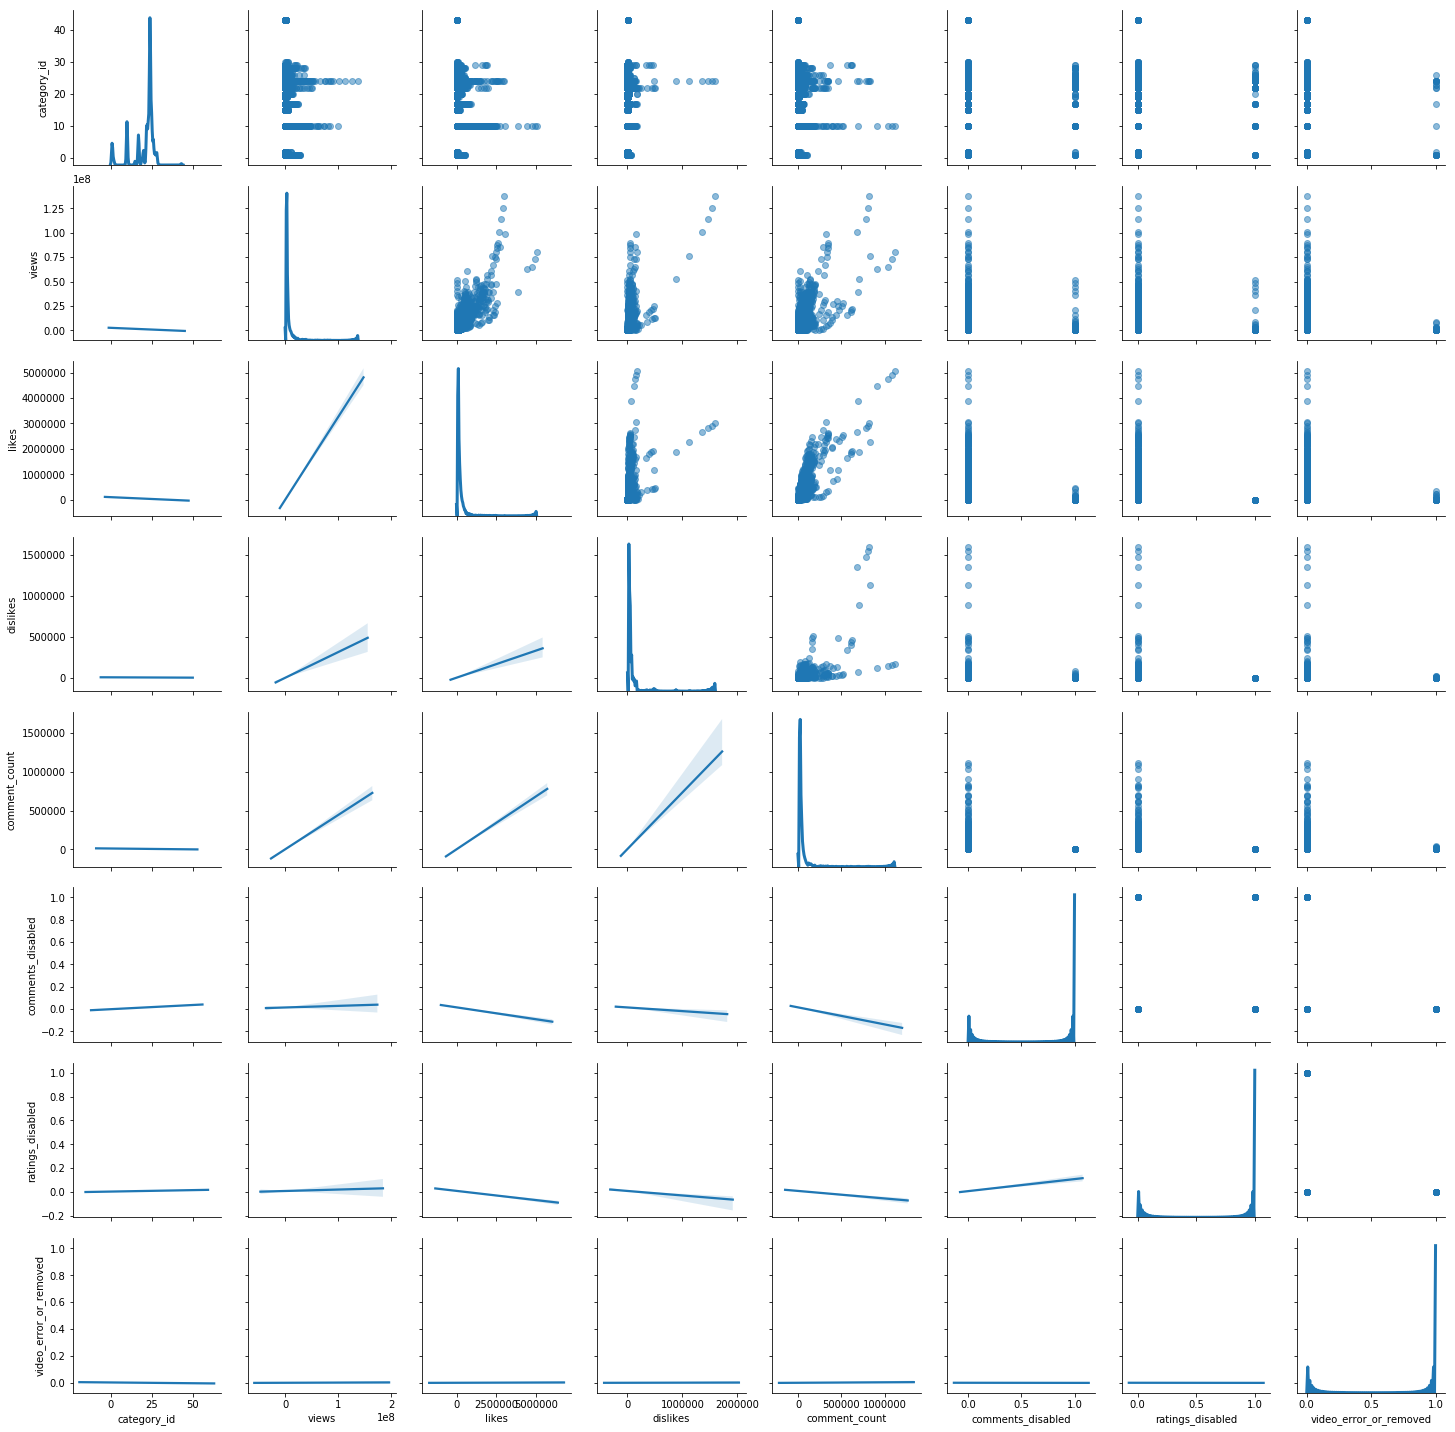

In [5]:
## Creating Scatterplot Matrix

## Declare Pairgrid
g = sns.PairGrid(df.dropna(), diag_sharey=False)

## Scatterplot
g.map_upper(plt.scatter, alpha=.5)

## Fit line 
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

## KDE plot
g.map_diag(sns.kdeplot, lw=3)
plt.show()

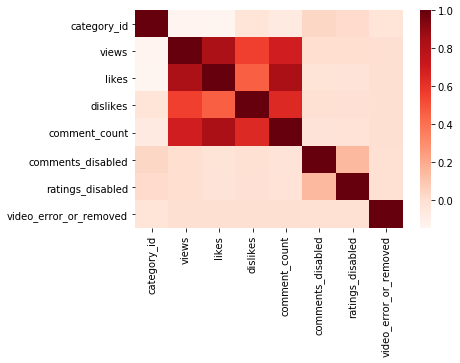

In [6]:
## Visualizing the Correlatedness of the variables

sns.heatmap(df.corr(), cmap='Reds')
plt.show()

In [7]:
## View Descriptive Staistics

df.describe()

,category_id,views,likes,dislikes,comment_count
count,40881.000,40881.000,40881.000,40881.000,40881.000
mean,20.796,1147035.911,39582.688,2009.195,5042.975
std,6.775,3390913.022,132689.531,19008.370,21579.021
min,1.000,733.000,0.000,0.000,0.000
25%,20.000,143902.000,2191.000,99.000,417.000
50%,24.000,371204.000,8780.000,303.000,1301.000
75%,24.000,963302.000,28717.000,950.000,3713.000
max,43.000,137843120.000,5053338.000,1602383.000,1114800.000


## Preparing Variables For Modeling

In [8]:
## Define target and outcome variables

x = df[['likes', 'dislikes', 'comment_count']]

y = df[['views']]

## Linear Regression Model

### Creating The Model

In [9]:

## Creating the Model and fitting it to the data
regr = linear_model.LinearRegression()
regr.fit(x, y)

## Display the attributes we calculated
print('Coefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:\n', regr.score(x, y))



Coefficients: 
 [[ 23.2796171   55.59041428 -42.35054959]]

Intercept: 
 [327446.82784377]

R-squared:
 0.7421154477701875


### Evaluating The Model

In [10]:
## Using Single Holdout Group

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(regr.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(regr.fit(x, y).score(x, y)))

With 20% Holdout: 0.7835210029117133
Testing on Sample: 0.7421154477701875


In [11]:
## Using Cross Validation

cross_val_score(regr, x, y, cv=10)

array([0.77389369, 0.86182028, 0.73945309, 0.62871511, 0.48773965,
       0.61667047, 0.66218745, 0.74810321, 0.76870511, 0.73249465])

In [12]:
score = cross_val_score(regr, x, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.70 (+/- 0.20)


In [13]:
## Definine RMSE function for frequent use

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

## Calculating Model RMSE

print('RMSE: ' + str(rmse(regr.predict(x), y)))

RMSE: views   1721963.741
dtype: float64


## K Nearest Neighbors Model

### Creating The Model

In [14]:
## Creating the Model

knn = neighbors.KNeighborsRegressor(n_neighbors=10)
knn.fit(x, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=10, p=2,
          weights='uniform')

### Evaluating The Model

In [15]:
print('\nR-squared:\n', knn.score(x, y))


R-squared:
 0.7987361563433983


In [16]:
## Using Single Holdout Group

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(knn.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(knn.fit(x, y).score(x, y)))

With 20% Holdout: 0.7734278410429897
Testing on Sample: 0.7987361563433983


In [17]:
## Using Cross Validation

cross_val_score(knn, x, y, cv=10)

array([0.78084683, 0.69123284, 0.76441557, 0.6954914 , 0.47845378,
       0.62618511, 0.67378506, 0.77047157, 0.74982773, 0.72778196])

In [18]:
score = cross_val_score(knn, x, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.70 (+/- 0.17)


In [19]:
## Calculating Model RMSE

print('RMSE: ' + str(rmse(knn.predict(x), y)))

RMSE: views   1521227.682
dtype: float64


## Analysis of the the Compared Utility of the Models

Both models used likes, dislikes and comment count as predictors for the view counts. Both models were evaluated using R squared, holdout groups, cross validation, and RMSE.
The OLS model showed that views actually decreased as comment count increased; information that wouldn’t be made apparent in a model type that doesn’t produce coefficients related to its predictors (such as KNN). 

The KNN model had a higher R squared value, a similar average cross validation score, and lower variance in the cross validation scores in relation to the OLS model. When I weighted the predictors in the KNN model the cross validation scores showed greater signs of overfitting and a small increase in accuracy. For this reason I chose to keep the unweighted KNN model to compare to the OLS model.

Based on this analysis, the KNN model was better for predicting the views of videos using this dataset. In a situation where there’s more distance between the data points I would be more likely to consider using OLS.

Possible effects of the data on this model include the relatedness of the continuous variables, the potential difference in scale between the continuous variables (people are naturally more likely to engage in forms of engagement that require less physical effort for example), and a lack of features. Despite all of this, the model was ab
